Quadratic approximation of log-likelihood function:

$$ l(\theta) \approx l(\hat\theta_{MLE}) + \frac{dl(\hat\theta_{MLE})}{d\theta} (\theta-\hat\theta_{MLE}) + \frac{1}{2} \frac{dl^2(\hat\theta_{MLE})}{d\theta^2} (\theta-\hat\theta_{MLE})^2$$

$$ = l(\hat\theta_{MLE}) + S(\hat\theta_{MLE})(\theta-\hat\theta_{MLE}) - \frac{1}{2} I(\hat\theta_{MLE})(\theta-\hat\theta_{MLE})^2$$

Due to $S(\hat\theta_{MLE})=0$ :

$$ \tilde l(\theta) = l(\theta)-l(\hat\theta_{MLE}) \approx - \frac{1}{2} .I (\hat\theta_{MLE})(\theta - \hat\theta_{MLE})^2$$

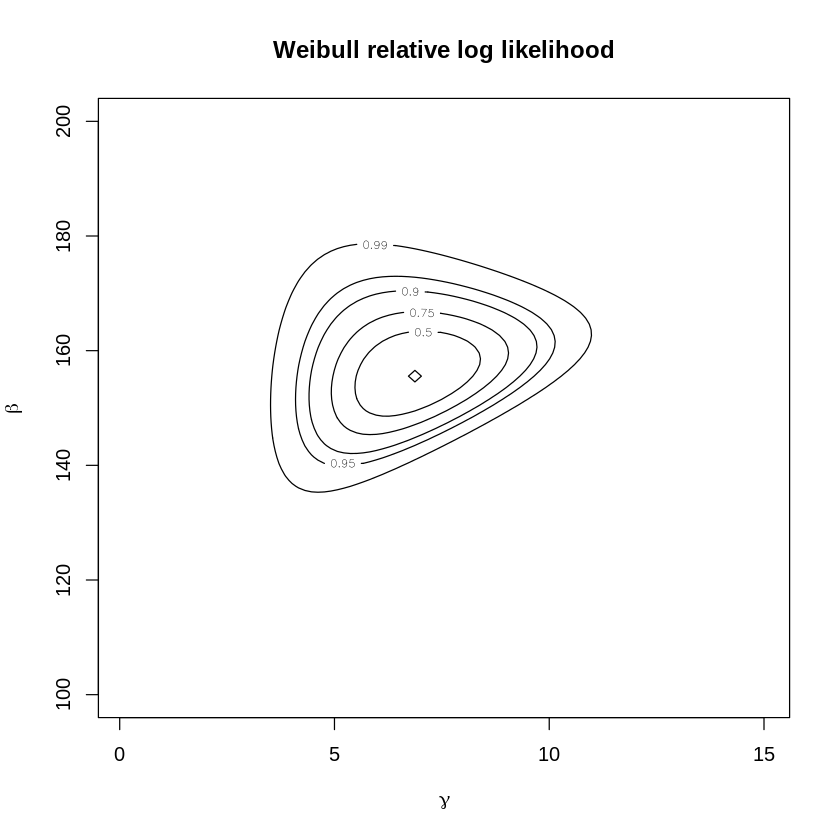

In [5]:
log_lik_weibull <- function( data, param){
  -sum(dweibull(data, shape = param[1], scale = param[2], log = TRUE))
}

y <- c(155.9, 200.2, 143.8, 150.1,152.1, 142.2, 147, 146, 146,
 170.3, 148, 140, 118, 144, 97)
n <- length(y)

 #define parameters grid
 gamma <- seq(0.1, 15, length=100)
 beta <- seq(100,200, length=100)
 parvalues <- expand.grid(gamma,beta)
 llikvalues <- apply(parvalues, 1, log_lik_weibull, data=y)
 llikvalues <- matrix(-llikvalues, nrow=length(gamma), ncol=length(beta),
 byrow=F)
 conf.levels <- c(0,0.5,0.75,0.9,0.95,0.99)
 
 #contour plot
 contour(gamma, beta, llikvalues-max(llikvalues),
 levels=-qchisq(conf.levels, 2)/2,
 xlab=expression(gamma),
 labels=as.character(conf.levels),
 ylab=expression(beta))
 title('Weibull relative log likelihood')



In [6]:
gammahat<-uniroot(function(x) n/x+sum(log(y))-n*
 sum(y^x*log(y))/sum(y^x),
 c(1e-5,15))$root
 
betahat<- mean(y^gammahat)^(1/gammahat)
 
weib.y.mle<-c(gammahat,betahat)

    
#first element is the MLE for the shape gamma, second element the MLE for the scale beta
weib.y.mle

[1]   6.886215 155.948671

In [7]:
#observed information matrix
 jhat<-matrix(NA,nrow=2,ncol=2)
 jhat[1,1]<-n/gammahat^2+sum((y/betahat)^gammahat*
 (log(y/betahat))^2)
 jhat[1,2]<-jhat[2,1]<- n/betahat-sum(y^gammahat/betahat^(gammahat+1)*
 (gammahat*log(y/betahat)+1))
 jhat[2,2]<- -n*gammahat/betahat^2+gammahat*(gammahat+1)/
 betahat^(gammahat+2)*sum(y^gammahat)
 solve(jhat)

1.543250,2.550504
2.550504,38.406106


In [8]:
#appr_gammahat<-uniroot(function(x) n/x+sum(log(y))-n*
# sum(y^x*log(y))/sum(y^x),
# c(1e-5,15))$root
 
appr_betahat<- mean(y^gammahat)^(1/gammahat)
 
weib.y.appr_mle<-c(appr_gammahat,appr_betahat)

    
#first element is the MLE for the shape gamma, second element the MLE for the scale beta
weib.y.appr_mle

ERROR: Error in eval(expr, envir, enclos): object 'appr_gammahat' not found


In [9]:
jh_matrix <- as.matrix(jhat)


quadraticLogLikelihood <- function(data, theta){
    -0.5 * t(theta - weib.y.mle) %*% 
    jh_matrix %*% 
    (theta - weib.y.mle)
}


y <- c(155.9, 200.2, 143.8, 150.1,152.1, 
       142.2, 147, 146, 146, 170.3, 148, 
       140, 118, 144, 97)
n <- length(y)

gamma <- seq(0.1, 15, length=100)
beta <- seq(100,200, length=100)
partials <- expand.grid(gamma,beta)
likelihood <- apply(partials, 1, quadraticLogLikelihood, data=y)
likelihood <- matrix(likelihood, nrow=length(gamma), ncol=length(beta),
                       byrow=F) 
conf.levels <- c(0,0.5,0.75,0.9,0.95,0.99)



In [10]:
log_lik_weibull <- function( data, param){
  -sum(dweibull(data, shape = param[1], scale = param[2], log = TRUE))
}

In [11]:
gammahat<-uniroot(function(x) n/x+sum(log(y))-n*
 sum(y^x*log(y))/sum(y^x),
 c(1e-5,15))$root
 betahat<- mean(y^gammahat)^(1/gammahat)
 weib.y.mle<-c(gammahat,betahat)
 #first element is the MLE for the shape gamma, second element the MLE for the scale beta
 weib.y.mle

[1]   6.886215 155.948671

In [14]:
omega <- function(theta) log(theta)
theta <- function(omega) exp(omega)
log_lik_weibull_rep <- function(data, param) log_lik_weibull(data, theta(param))
weib.y.nlm<-nlm(log_lik_weibull_rep,c(0,0),hessian=T,data=y)
weib.y.nlm

Warning message in dweibull(data, shape = param[1], scale = param[2], log = TRUE):
“NaNs produced”Warning message in nlm(log_lik_weibull_rep, c(0, 0), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”Warning message in dweibull(data, shape = param[1], scale = param[2], log = TRUE):
“NaNs produced”Warning message in nlm(log_lik_weibull_rep, c(0, 0), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”Warning message in dweibull(data, shape = param[1], scale = param[2], log = TRUE):
“NaNs produced”Warning message in nlm(log_lik_weibull_rep, c(0, 0), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”Warning message in nlm(log_lik_weibull_rep, c(0, 0), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”Warning message in dweibull(data, shape = param[1], scale = param[2], log = TRUE):
“NaNs produced”Warning message in nlm(log_lik_weibull_rep, c(0, 0), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”Warning 

34.53496,-51.49153
-51.49153,708.83544


In [15]:
theta(weib.y.nlm$estimate)

[1]   6.886177 155.948219

In [18]:
omega <- function(theta) log(theta)
theta <- function(omega) exp(omega)
log_lik_weibull_rep <- function(data, param) log_lik_weibull(data, log(param))
weib.y.nlm<-nlm(log_lik_weibull_rep,c(0,0),hessian=T,data=y)
weib.y.nlm

Warning message in dweibull(data, shape = param[1], scale = param[2], log = TRUE):
“NaNs produced”Warning message in dweibull(data, shape = param[1], scale = param[2], log = TRUE):
“NaNs produced”Warning message in nlm(log_lik_weibull_rep, c(0, 0), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”Warning message in dweibull(data, shape = param[1], scale = param[2], log = TRUE):
“NaNs produced”Warning message in nlm(log_lik_weibull_rep, c(0, 0), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”Warning message in dweibull(data, shape = param[1], scale = param[2], log = TRUE):
“NaNs produced”Warning message in nlm(log_lik_weibull_rep, c(0, 0), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”Warning message in dweibull(data, shape = param[1], scale = param[2], log = TRUE):
“NaNs produced”Warning message in nlm(log_lik_weibull_rep, c(0, 0), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”Warning message in dweibull(da

0,0
0,0
